In [55]:
import numpy as np
import random
import pandas as pd
import numpy as np
import math
import seaborn as sns
import mpu
from scipy.signal import savgol_filter
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import train_test_split
%matplotlib inline

# Features

In [40]:
features = pd.read_csv('senior_venues_features_labels.csv', sep = '\t', index_col = 0)
features = features.drop(columns = ['LABEL_category'])
print len(features)
features.head()

8183


,WHERE_sub_region,WHERE_distance_from_center,WHERE_building,WHERE_food,WHERE_na,WHERE_travel,WHERE_Venues_num,WHERE_user_centroids,WHERE_parks_outdoors,WHERE_Entropy,...,WHO_v_wa_pagerank_inv_distances,WHO_v_wa_geo_stdev_of_ego_inv_distances,WHO_v_wa_betweenness_wa,WHO_v_wa_clustering_grav_distances,WHO_v_wa_geo_social_stretch_distances,WHO_v_wa_egosize,WHO_v_wa_geo_stdev_of_ego_distances,WHO_v_wa_constraint_wa,WHO_v_wa_pagerank_exp_distances,WHO_v_wa_eigenvector
venue,,,,,,,,,,,,,,,,,,,,,
4a5f9446f964a520e0bf1fe3,0,4.064099,0.175676,0.280405,0.010135,0.187500,592,192,0.043919,0.811208,...,0.000021,0.0,0.0,0.0,2.019477,2.0,0.0,1.0,0.000019,0.0
4abcec53f964a520b98720e3,0,0.232250,0.202420,0.303504,0.009327,0.072473,7934,4835,0.043988,0.827807,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
4abdc1c7f964a5206d8b20e3,0,2.306181,0.317386,0.252042,0.016336,0.039090,1714,651,0.030922,0.781289,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
4abe4502f964a520558c20e3,0,1.137742,0.202420,0.303504,0.009327,0.072473,7934,4835,0.043988,0.827807,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
4abe5714f964a520d68c20e3,0,0.707539,0.199941,0.273588,0.016169,0.053239,10143,5276,0.012620,0.770677,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0


In [65]:
print list(features.keys())

['WHERE_sub_region', 'WHERE_distance_from_center', 'WHERE_building', 'WHERE_food', 'WHERE_na', 'WHERE_travel', 'WHERE_Venues_num', 'WHERE_user_centroids', 'WHERE_parks_outdoors', 'WHERE_Entropy', 'WHERE_nightlife', 'WHAT_venue_subcat', 'WHAT_venue_cat', 'WHERE_shops', 'WHERE_education', 'WHERE_event', 'WHERE_arts_entertainment', 'WHAT_pricerange', 'WHO_v_social_stretch', 'WHO_v_social_std', 'WHO_m_entropy', 'WHO_m_avg', 'WHO_m_4_fraction', 'WHO_m_std', 'WHO_m_2_fraction', 'WHO_m_3_fraction', 'WHO_m_1_fraction', 'WHO_fraction_of_regulars', 'WHERE_ArtsEmploy', 'WHERE_BornUK', 'WHERE_DistCentre', 'WHERE_GrenSpace', 'WHERE_HapScore', 'WHERE_IMDScore', 'WHERE_MedHPrice', 'WHERE_NoCTFtoH', 'WHERE_NoDwelling', 'WHERE_NoPropsSld', 'WHERE_PopDen', 'WHERE_emb_building', 'WHERE_emb_own_cat', 'WHERE_emb_food', 'WHERE_emb_na', 'WHERE_emb_travel', 'WHERE_emb_parks_outdoors', 'WHERE_emb_nightlife', 'WHERE_emb_shops', 'WHERE_emb_education', 'WHERE_emb_event', 'WHERE_emb_arts_entertainment', 'WHO_v_wa_

# Filter measures

In [41]:
demo_off  = ['WHERE_' +  w for w in ['PercLev4Qu', 'z_PercLev4Qu',  'zt_MedHPrice', 'IncomeScor', 'z_IncomeScor', 'GiniSimpso', 'zt_GiniSimpso', 'NotBornUK', 'z_NotBornUK_ratio', 'zt_PopDen', 'LivingEnSc', 'z_LivingEnSc', 'NoFlats', 'PTALScore', 'zt_PTALScore', 'EntireAirb', 'zt_ArtsEmploy_ratio', 'NoHotels', 'NoEmployee',  'No4sqCheck', 'NoOSPOIs', 'zt_NoOSPOIs', 'zt_NoEmployee_ratio','NoOwndDwel', 'z_NoOwndDwel_ratio', 'NoHouses', 'z_NoHouses_ratio','z_distCent1', 'zt_GrenSpace',  'zt_NoPropsSld',  'zt_NoCTFtoH']]
user_nw   = [u for u in features.keys() if 'WHO_u' in u]
user_succ = [u for u in features.keys() if 'tipCount' in u or 'checkinsCount' in u or 'usersCount' in u or 'Llikecount' in u or 'lLondon' in u]

features  = features.drop(columns = demo_off + user_nw + user_succ)

len(features.keys())

91

# Success measurs

In [42]:
city        = 'london'
datafile    = 'FINAL_DATA'
successdata = datafile + '/london_venues_success_measures.csv'
venues      = [line.strip() for line in open(datafile + '/senior_venues_lists.dat')]


success  = pd.read_csv(successdata, sep = '\t', index_col = 0)
success  = success[~success.index.duplicated(keep='first')]   
success  = success[success.index.isin(venues)]



successdata_L = datafile + '/london_venues_success_measures_local_like.csv'
success_L     = pd.read_csv(successdata_L, sep = '\t', index_col = 0)
success_L     = success_L[~success_L.index.duplicated(keep='first')]   
success       = success.join(success_L)

success.index.name = 'venue'

success.head()   

,tipCount,checkinsCount,usersCount,Llikecount
venue,,,,
4a5f9446f964a520e0bf1fe3,75.0,2500.0,1831.0,33.195062
4abcec53f964a520b98720e3,17.0,1550.0,913.0,16.468388
4abdc1c7f964a5206d8b20e3,47.0,5573.0,2777.0,91.575568
4abe4502f964a520558c20e3,575.0,97190.0,80793.0,445.616354
4abe5714f964a520d68c20e3,54.0,1507.0,1256.0,49.789535


In [43]:
def get_success_Qs(segments, success, measure, randomized = False):

    if randomized: 
        np.random.shuffle(success[measure])
        
    labels = ['q' + str(i+1) for i in range(segments)]    
        
    success['quartile'] = pd.qcut(success[measure], segments, labels)
    Q1 = list(success[success['quartile'] == labels[0]].index)
    Q4 = list(success[success['quartile'] == labels[-1]].index)

    
    return Q4, Q1, success


def get_success_Q1_Q4_features(success, VenuesTop, VenuesBottom):


    features_VenuesTop               = features[features.index.isin(VenuesTop)]
    features_VenuesBottom            = features[features.index.isin(VenuesBottom)]
    features_VenuesTop['success']    = 1
    features_VenuesBottom['success'] = 0

    X = features_VenuesTop.append(features_VenuesBottom)
    y = np.asarray(X.success)
    X = X.drop(columns = ['success'])
    X = X.round(2)
    
    return X, y



# Feature importance

/home/milan/.local/lib/python2.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/milan/.local/lib/python2.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


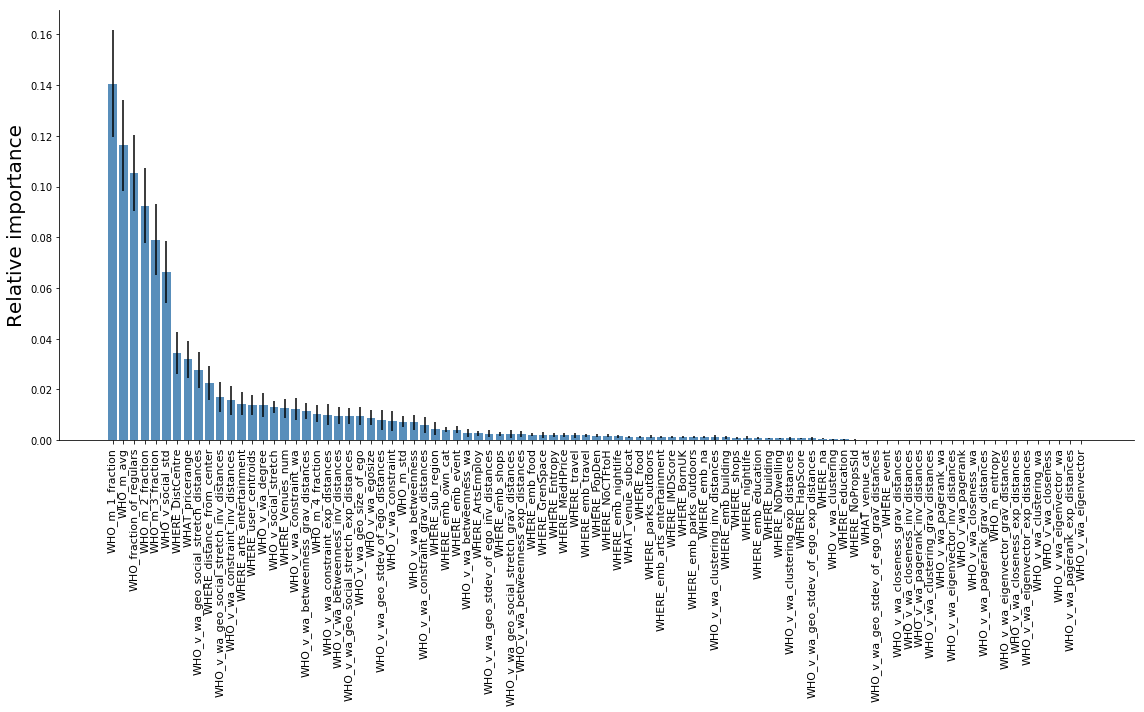

In [58]:
def importance(X, y):
   
    X_ = X
 
    N = 100

    classifier = RandomForestClassifier(max_depth=4, n_estimators=N, max_features='auto') 
    classifier.fit(X_, y) 
    
    X_head = X.keys()

    
    importances = classifier.feature_importances_
    std         = np.std([tree.feature_importances_ / math.sqrt(float(N)) for tree in classifier.estimators_], axis=0)
    indices     = np.argsort(importances)[::-1]
    

    df = pd.DataFrame()
    df['ind'], df['val'], xlabels = zip(*[(X_head[i], importances[i], X_head[i]) for i in indices])   
    df    = df.sort_values(['val'], ascending = False)
    f, ax = plt.subplots(1, 1, figsize=(16, 10))
    
    impy = importances[indices]#[i for i in importances[indices] if i > 0.001]
    err  = std[indices]
    
    
    ax.bar(range(len(impy)), impy, color="steelblue", yerr=std[indices], alpha = 0.9, align="center")

    
    
    
    
    ax.set_xticks(range(len(impy)))
    ax.set_xticklabels(xlabels, rotation = 90, fontsize = 11)
    ax.set_ylabel('Relative importance', fontsize = 20)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    plt.tight_layout()
    
    return importances[indices], xlabels


X, y = get_success_Q1_Q4_features(success, VenuesTop, VenuesBottom)
importances, imp_features = importance(X, y)

In [64]:
for i in range(len(importances)):
    
    print  imp_features[i], round(importances[i],3)

WHO_m_1_fraction 0.14
WHO_m_avg 0.116
WHO_fraction_of_regulars 0.105
WHO_m_2_fraction 0.092
WHO_m_3_fraction 0.079
WHO_v_social_std 0.066
WHERE_DistCentre 0.034
WHAT_pricerange 0.032
WHO_v_wa_geo_social_stretch_distances 0.028
WHERE_distance_from_center 0.023
WHO_v_wa_geo_social_stretch_inv_distances 0.017
WHO_v_wa_constraint_inv_distances 0.016
WHERE_arts_entertainment 0.014
WHERE_user_centroids 0.014
WHO_v_wa_degree 0.014
WHO_v_social_stretch 0.013
WHERE_Venues_num 0.013
WHO_v_wa_constraint_wa 0.012
WHO_v_wa_betweenness_grav_distances 0.011
WHO_m_4_fraction 0.01
WHO_v_wa_constraint_exp_distances 0.01
WHO_v_wa_betweenness_inv_distances 0.01
WHO_v_wa_geo_social_stretch_exp_distances 0.01
WHO_v_wa_geo_size_of_ego 0.009
WHO_v_wa_egosize 0.009
WHO_v_wa_geo_stdev_of_ego_distances 0.008
WHO_v_wa_constraint 0.007
WHO_m_std 0.007
WHO_v_wa_betweenness 0.007
WHO_v_wa_constraint_grav_distances 0.006
WHERE_sub_region 0.004
WHERE_emb_own_cat 0.004
WHERE_emb_event 0.004
WHO_v_wa_betweenness_wa 0.00

# Classification

In [71]:
def classifiers_types(X, y, tipus = '', randomize = False):
   
    y_ = np.asarray(list(y))
    X_ = X.drop(columns = [c for c in X.keys() if tipus not in c ])
    
    if randomize: 
        random.shuffle(y_)
        
    classifier = RandomForestClassifier(max_depth=5, n_estimators=1000, max_features='auto') 
    X_train, X_test, y_train, y_test =  train_test_split(X_, y_, test_size=.33, random_state=42)

    classifier.fit(X_train, y_train)
    score = classifier.score(X_test, y_test)
    meanc = np.mean(cross_val_score(classifier, X_train, y_train, cv=10))
    print  'CrossCalScore\t', score, meanc

    return meanc



def get_numbers(X, y):
        
    allf   = classifiers_types(X, y, tipus = '', randomize = False)
    where  = classifiers_types(X, y, tipus = 'WHERE', randomize = False)
    who    = classifiers_types(X, y, tipus = 'WHO',   randomize = False)
    what   = classifiers_types(X, y, tipus = 'WHAT',  randomize = False)
    rand   = classifiers_types(X, y, tipus = '', randomize = True)
    
    
    return (allf, where, who, what, rand)

In [67]:
def plot_class(allf, who, where, what, rand, successmeasure):

    df = pd.DataFrame()
    df['ind'] = ['All','WHO', 'WHERE', 'WHAT', 'Random']
    df['val'] = [allf, who, where, what, rand]
    df        = df.sort_values(['val'], ascending = False)


    f, ax = plt.subplots(1, 1, figsize=(10, 6))

    sns.barplot(x="ind", y="val", data=df, ax = ax, alpha = 0.8, capsize=.2 )
    ax.set_ylabel('Test accurracy', fontsize = 20)
    ax.set_xlabel('Feature set', fontsize = 20)
    ax.set_xticklabels(df['ind'], fontsize = 15)
    #ax.set_yticklabels(['0%', '10%','20%','30%','40%', '50%', '60%'], fontsize = 15)

    ax.axhline(y = 0.52, linewidth=4, color='r')
    ax.set_title(successmeasure + '  --  RandomForest', fontsize = 25)
    rects = ax.patches

    for rect, label in zip(rects, df['val']):
        height = rect.get_height()
        label = str(round(100*label, 2)) + ' %'
        ax.text(rect.get_x() + rect.get_width() / 2, height-0.08 , label,ha='center', weight = 'bold', va='bottom', color = 'white', fontsize = 15)


    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.tight_layout()
    #plt.savefig('FINAL_FIGURES/2_features_accuracy.png')
    plt.show()

/home/milan/.local/lib/python2.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/milan/.local/lib/python2.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


CrossCalScore	0.7920353982300885 0.7838006212553975
CrossCalScore	0.6482300884955752 0.6504095957993133
CrossCalScore	0.7971976401179941 0.7805596299395094
CrossCalScore	0.637905604719764 0.6366255445601684
CrossCalScore	0.4911504424778761 0.5036191204331477


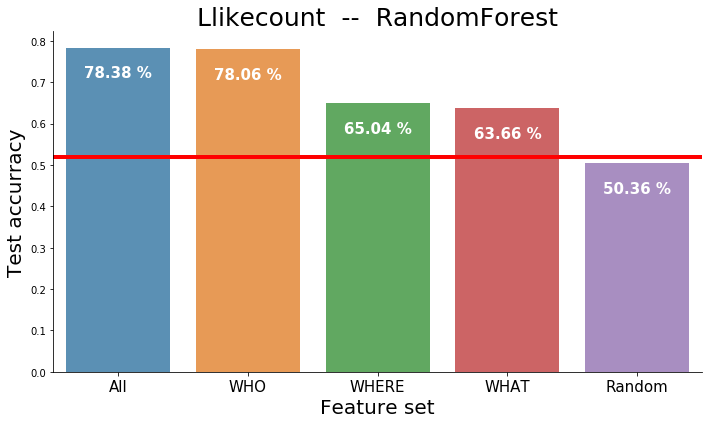

In [72]:
# tipCount, checkinsCount, usersCount, Llikecount


successmeasure = 'Llikecount'
VenuesTop, VenuesBottom, success = get_success_Qs(4, success, successmeasure, randomized = False)
X, y = get_success_Q1_Q4_features(success, VenuesTop, VenuesBottom)
(allf, where, who, what, rand) = get_numbers(X, y)
plot_class(allf, who, where, what, rand, successmeasure)

In [69]:
data     = {}

for  successmeasure in ['tipCount', 'checkinsCount', 'usersCount', 'Llikecount']:

    VenuesTop, VenuesBottom, success = get_success_Qs(4, success, successmeasure, randomized = False)
    X, y = get_success_Q1_Q4_features(success, VenuesTop, VenuesBottom)
    (allf, where, who, what, rand) = get_numbers(X, y)
    
    if 'WHERE' not in data:
        data['WHERE'] = [(successmeasure, where)]
    else:
        data['WHERE'].append((successmeasure, where))
        
        
    if 'WHO' not in data:
        data['WHO'] = [(successmeasure, who)]
    else:
        data['WHO'].append((successmeasure, who))

        
    if 'WHAT' not in data:
        data['WHAT'] = [(successmeasure, what)]
    else:
        data['WHAT'].append((successmeasure, what))       

        
        


/home/milan/.local/lib/python2.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/milan/.local/lib/python2.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


CrossCalScore	0.9458874458874459 0.9321314756661847
CrossCalScore	0.70995670995671 0.6943929485752628
CrossCalScore	0.943001443001443 0.9299939739119688
CrossCalScore	0.6940836940836941 0.7220971175221003
CrossCalScore	0.51010101010101 0.506041222459133
CrossCalScore	0.9332344213649851 0.9239825506681161
CrossCalScore	0.7262611275964391 0.7108991958147666
CrossCalScore	0.93026706231454 0.9188691954111191
CrossCalScore	0.6965875370919882 0.6867587322945354
CrossCalScore	0.5081602373887241 0.4989035087719298
CrossCalScore	0.9688658265381764 0.9572600355739823
CrossCalScore	0.7768717568569311 0.771358785366041
CrossCalScore	0.9659006671608599 0.9528780695356188
CrossCalScore	0.6886582653817642 0.6796742037442257
CrossCalScore	0.48035581912527797 0.5029183720528045
CrossCalScore	0.9808259587020649 0.9821942347761835
CrossCalScore	0.6408554572271387 0.6257241375487147
CrossCalScore	0.9823008849557522 0.9814672264155874
CrossCalScore	0.6430678466076696 0.6340783981107285
CrossCalScore	0.5103

WHAT ('Llikecount', 'usersCount', 'checkinsCount', 'tipCount')
WHO ('checkinsCount', 'tipCount', 'usersCount', 'Llikecount')
WHERE ('Llikecount', 'tipCount', 'checkinsCount', 'usersCount')


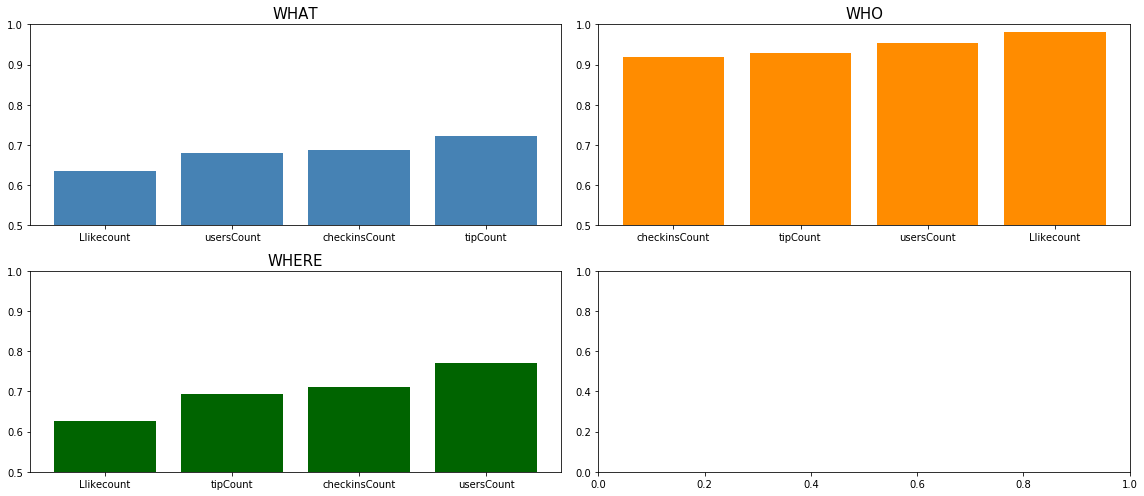

In [71]:
f, ax    = plt.subplots(2,2, figsize = (16,7))
indicies = [(i,j) for i in range(2) for j in range(2)]
colors   = ['steelblue', 'darkorange', 'darkgreen', 'crimson','purple']

for ind, (dat, vals) in enumerate(data.items()):
    
    bx = ax[indicies[ind]]
    
    
    x, y = zip(*sorted(vals, key=lambda tup: tup[1]))
    
    bx.set_title(dat,fontsize = 15)
    bx.set_ylim([0.5, 1.0])
    bx.bar(x,y, color = colors[ind])
    print dat, x
    #bx.bar
    
plt.tight_layout()
    
